In [1]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import scipy.stats
import statistics
import math
import random
%matplotlib inline

# 1 задача

In [2]:
real_theta = 197
uniform_rv = scipy.stats.uniform( 0, real_theta-0 )
size = 100
sample = uniform_rv.rvs( size )


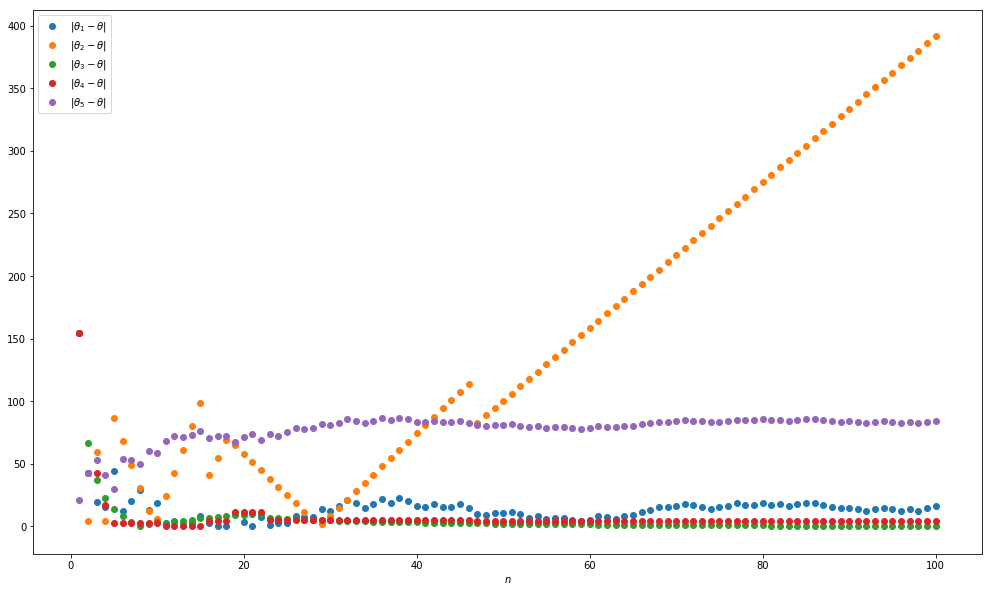

In [3]:
y_1, y_2, y_3, y_4, y_5 = [], [], [], [], []
for i in range(1,size+1):
    theta_1 = 2 * statistics.mean(sample[:i])
    theta_2 = (i+1)*min(sample[:i])
    theta_3 = (i+1)/i*max(sample[:i])
    theta_4 = min(sample[:i]) + max(sample[:i])
    if i != 1:
        theta_5 = sample[0] + statistics.mean(sample[1:i])
    else:
        theta_5 = sample[0]
    y_1.append( abs(theta_1 - real_theta) )
    y_2.append( abs(theta_2 - real_theta) )
    y_3.append( abs(theta_3 - real_theta) )
    y_4.append( abs(theta_4 - real_theta) )
    y_5.append( abs(theta_5 - real_theta) )
n = list(range(1,101))
pyplot.figure( figsize=(17,10) )
pyplot.scatter(n, y_1, label = "$|θ_1-θ|$")
pyplot.xlabel('$n$')
pyplot.scatter(n,y_2, label = "$|θ_2-θ|$")
pyplot.scatter(n,y_3, label = "$|θ_3-θ|$")
pyplot.scatter(n,y_4, label = "$|θ_4-θ|$")
pyplot.scatter(n, y_5, label = "$|θ_5-θ|$")
pyplot.legend()
pyplot.show()

# 2 задача

In [4]:
#функция распределения вероятности
def my_gamma(x,th = 3):
    return -numpy.exp(-x/th)+1
# не нужно

# 3 задача

In [5]:
real_theta = 85
uniform_rv = scipy.stats.uniform( 0, real_theta-0 )
size = 100
sample = uniform_rv.rvs( size )
beta = 0.95
theta_1 = 2*statistics.mean(sample)
theta_2 = (size+1)/size*max(sample)

In [6]:
#Точный доверительный интервал

In [7]:
a = max(sample)/(1+beta)**(1/size)
b = max(sample)/(1-beta)**(1/size)
print("Оценка методом максимального правдоподобия theta_2 =",theta_2)
print("Точный доверительный интервал для theta_2 ( beta =", beta,"):",a,"< θ <",b)
print("Длина доверительного интервала =",b-a)

Оценка методом максимального правдоподобия theta_2 = 84.47476232854254
Точный доверительный интервал для theta_2 ( beta = 0.95 ): 83.08167785884903 < θ < 86.18186829739997
Длина доверительного интервала = 3.100190438550939


In [20]:
#bootstrap для оценки максимального правдоподобия
k = 1000 #количество выборок
sample_theta_bootstrap = []
for _ in range(k):
    random.seed( version=2) 
    bootstrap = [sample[random.randint(0,size-1)] for _ in range(size)]
    theta_bootstrap = (size+1)/size*max(bootstrap)
    #theta_bootstrap = 2*statistics.mean(bootstrap)
    sample_theta_bootstrap.append(abs(theta_bootstrap - theta_2))
sample_theta_bootstrap.sort()
eps = sample_theta_bootstrap[int(beta*k)+1]
print("Бутстреповский доверительный интервал для theta_2 ( beta =",beta,"):",theta_2-eps,"< θ <",theta_2+eps)
print("Длина доверительного интервала =",2*eps)

Бутстреповский доверительный интервал для theta_2 ( beta = 0.95 ): 81.4706185529177 < θ < 87.47890610416738
Длина доверительного интервала = 6.00828755124968


# 4 задача

In [7]:
real_theta = 30
size = 1000
beta = 0.95

pareto_rv = scipy.stats.pareto(real_theta-1)
sample = pareto_rv.rvs( size )
theta = 1+size/sum(numpy.log(sample))

In [8]:
#находим квантили для точного доверительного интервала(гамма распределение)
x = 0
gamma_rv = scipy.stats.gamma(a = size)
while abs(gamma_rv.cdf(x)-(1+beta)/2)>0.001:
    x+=0.001
    if abs(gamma_rv.cdf(x)-(1-beta)/2) <=0.001 :
        quantile_1 = x
quantile_2 = x


In [9]:
a = 1 + quantile_1/size*(theta-1)
b = 1 + quantile_2/size*(theta-1)
print("Оценка методом максимального правдоподобия theta =",theta )
print("Точный доверительный интервал для theta ( beta =", beta,"):",a,"< θ <",b )
print("Длина доверительного интервала =",b-a)
len_precise = b-a

Оценка методом максимального правдоподобия theta = 29.765960777695238
Точный доверительный интервал для theta ( beta = 0.95 ): 28.025131128871223 < θ < 31.560007452993933
Длина доверительного интервала = 3.5348763241227097


In [24]:
#находим квантили для нормального распределения (0,1)
mu = 0
sigma = 1
norm_rv = scipy.stats.norm(loc=mu, scale=sigma)
x = -10
while abs(norm_rv.cdf(x)-(1-beta)/2)>0.0001:
    x+=0.001
quantile_norm_2 = -x
quantile_norm_1 = x


In [25]:
a_1 = theta - (theta-1)/math.sqrt(size)*quantile_norm_2
b_1 = theta + (theta-1)/math.sqrt(size)*quantile_norm_2
print("Асимптотический доверительный интервал для theta ( beta =", beta,"):",a_1,"< θ <",b_1)
print("Длина доверительного интервала =",b_1-a_1)
len_asymptotic = b_1 - a_1

Асимптотический доверительный интервал для theta ( beta = 0.95 ): 1.7604110582961248 < θ < 2.1313940376016847
Длина доверительного интервала = 0.3709829793055599


In [40]:
#bootstrap для оценки максимального правдоподобия
k = 1000 #количество выборок
sample_theta_bootstrap = []
for _ in range(k):
    bootstrap = [sample[random.randint(0,size-1)] for _ in range(size)]
    theta_bootstrap = 1+size/sum(numpy.log(bootstrap))
    sample_theta_bootstrap.append(abs(theta_bootstrap - theta))
sample_theta_bootstrap.sort()
eps = sample_theta_bootstrap[int(beta*k)+1]
print("Бутстреповский доверительный интервал для theta ( beta =",beta,"):",theta-eps,"< θ <",theta+eps)
print("Длина бутстреповского доверительного интервала =",2*eps)
len_bootstrap = 2*eps

Бутстреповский доверительный интервал для theta ( beta = 0.95 ): 1.7748240768230823 < θ < 2.116981019074727
Длина бутстреповского доверительного интервала = 0.34215694225164484


In [41]:
lenths =[len_bootstrap, len_asymptotic, len_precise]
print("Самый длинный доверительный интервал =",max(lenths))
print("Самый короткий доверительный интервал =",min(lenths))

Самый длинный доверительный интервал = 0.3709829793055599
Самый короткий доверительный интервал = 0.34215694225164484
